In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, r2_score
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

In [2]:
df = pd.read_csv('customer_feedback_satisfaction.csv')
df.head(5)

,CustomerID,Age,Gender,Country,Income,ProductQuality,ServiceQuality,PurchaseFrequency,FeedbackScore,LoyaltyLevel,SatisfactionScore
0,1,56,Male,UK,83094,5,8,5,Low,Bronze,100.0
1,2,69,Male,UK,86860,10,2,8,Medium,Gold,100.0
2,3,46,Female,USA,60173,8,10,18,Medium,Silver,100.0
3,4,32,Female,UK,73884,7,10,16,Low,Gold,100.0
4,5,60,Male,UK,97546,6,4,13,Low,Bronze,82.0


In [3]:
print(f"Dataset shape: {df.shape}")

df.info()

df.describe().round(3)

Dataset shape: (38444, 11)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38444 entries, 0 to 38443
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   CustomerID         38444 non-null  int64  
 1   Age                38444 non-null  int64  
 2   Gender             38444 non-null  object 
 3   Country            38444 non-null  object 
 4   Income             38444 non-null  int64  
 5   ProductQuality     38444 non-null  int64  
 6   ServiceQuality     38444 non-null  int64  
 7   PurchaseFrequency  38444 non-null  int64  
 8   FeedbackScore      38444 non-null  object 
 9   LoyaltyLevel       38444 non-null  object 
 10  SatisfactionScore  38444 non-null  float64
dtypes: float64(1), int64(6), object(4)
memory usage: 3.2+ MB


,CustomerID,Age,Income,ProductQuality,ServiceQuality,PurchaseFrequency,SatisfactionScore
count,38444.000,38444.000,38444.000,38444.000,38444.000,38444.000,38444.000
mean,19222.500,43.497,75076.619,5.495,5.493,10.454,85.276
std,11097.971,14.973,25975.753,2.873,2.876,5.766,16.899
min,1.000,18.000,30001.000,1.000,1.000,1.000,4.280
25%,9611.750,31.000,52624.500,3.000,3.000,5.000,74.470
50%,19222.500,43.000,75236.000,5.000,5.000,10.000,91.270
75%,28833.250,56.000,97606.750,8.000,8.000,15.000,100.000
max,38444.000,69.000,119999.000,10.000,10.000,20.000,100.000


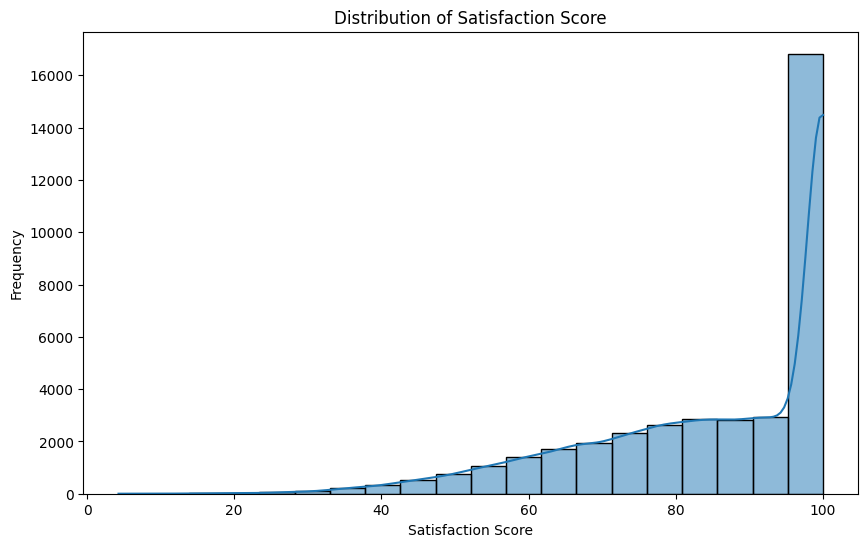

In [4]:
plt.figure(figsize = (10, 6))
sns.histplot(df['SatisfactionScore'], bins = 20, kde = True)
plt.title('Distribution of Satisfaction Score')
plt.xlabel('Satisfaction Score')
plt.ylabel('Frequency')
plt.show()


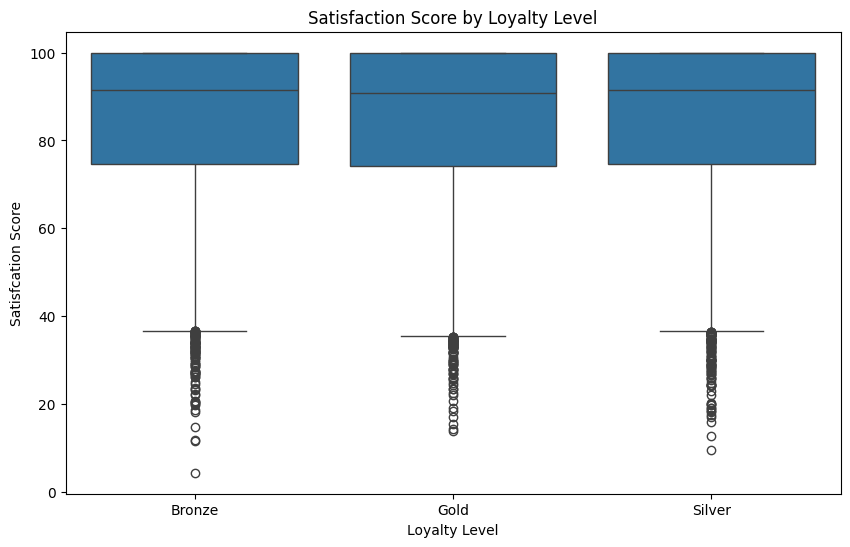

In [5]:
plt.figure(figsize = (10, 6))
sns.boxplot(x = 'LoyaltyLevel', y = 'SatisfactionScore', data = df)
plt.title('Satisfaction Score by Loyalty Level')
plt.xlabel('Loyalty Level')
plt.ylabel('Satisfcation Score')
plt.show()

In [6]:
df = pd.get_dummies(df, columns = ['Gender', 'Country', 'FeedbackScore', 'LoyaltyLevel'], drop_first = True)

In [7]:
scaler = StandardScaler()
numerical_features = ['Age', 'Income', 'ProductQuality', 'ServiceQuality', 'PurchaseFrequency']
df[numerical_features] = scaler.fit_transform(df[numerical_features])

In [8]:
df.head()

,CustomerID,Age,Income,ProductQuality,ServiceQuality,PurchaseFrequency,SatisfactionScore,Gender_Male,Country_France,Country_Germany,Country_UK,Country_USA,FeedbackScore_Low,FeedbackScore_Medium,LoyaltyLevel_Gold,LoyaltyLevel_Silver
0,1,0.835071,0.308653,-0.172196,0.871845,-0.945943,100.0,True,False,False,True,False,True,False,False,False
1,2,1.703326,0.453636,1.568051,-1.214549,-0.425611,100.0,True,False,False,True,False,False,True,True,False
2,3,0.167182,-0.573759,0.871952,1.567310,1.308830,100.0,False,False,False,False,True,False,True,False,True
3,4,-0.767862,-0.045913,0.523903,1.567310,0.961942,100.0,False,False,False,True,False,True,False,True,False
4,5,1.102227,0.865025,0.175854,-0.519084,0.441609,82.0,True,False,False,True,False,True,False,False,False


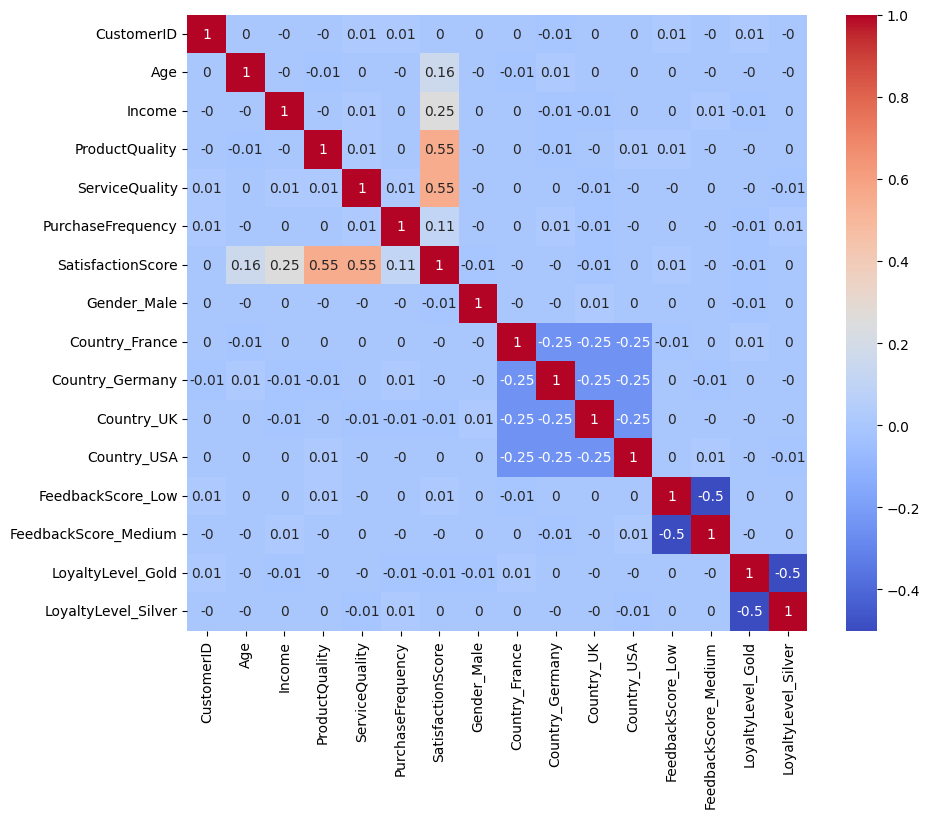

In [9]:
plt.figure(figsize = (10, 8))
sns.heatmap(df.corr().round(2), annot = True, cmap = 'coolwarm')
plt.show()

In [10]:
df.describe().round(2)

,CustomerID,Age,Income,ProductQuality,ServiceQuality,PurchaseFrequency,SatisfactionScore
count,38444.00,38444.00,38444.00,38444.00,38444.00,38444.00,38444.00
mean,19222.50,0.00,-0.00,0.00,0.00,-0.00,85.28
std,11097.97,1.00,1.00,1.00,1.00,1.00,16.90
min,1.00,-1.70,-1.74,-1.56,-1.56,-1.64,4.28
25%,9611.75,-0.83,-0.86,-0.87,-0.87,-0.95,74.47
50%,19222.50,-0.03,0.01,-0.17,-0.17,-0.08,91.27
75%,28833.25,0.84,0.87,0.87,0.87,0.79,100.00
max,38444.00,1.70,1.73,1.57,1.57,1.66,100.00


In [11]:
X = df.drop(columns = ['CustomerID', 'SatisfactionScore'])
y = df['SatisfactionScore']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)


In [12]:
model = RandomForestRegressor()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print("MAE:", mean_absolute_error(y_test, y_pred))
print("R² Score:", r2_score(y_test, y_pred))


MAE: 5.6725484588373
R² Score: 0.7679342369868536


In [13]:
features_for_clustering = df[['Income', 'SatisfactionScore', 'PurchaseFrequency']]
kmeans = KMeans(n_clusters = 3)
df['Cluster'] = kmeans.fit_predict(features_for_clustering)


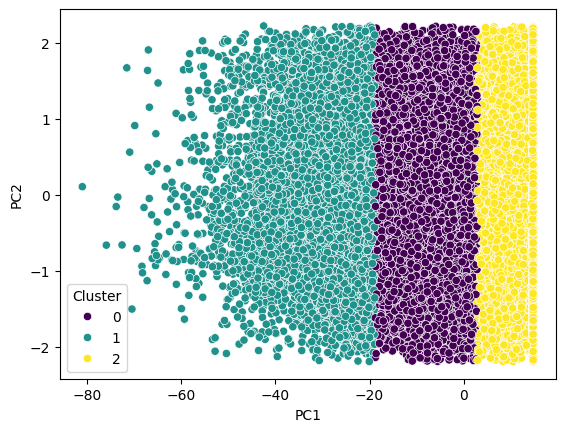

In [14]:
pca = PCA(n_components = 2)
principal_components = pca.fit_transform(features_for_clustering)
df['PC1'] = principal_components[:, 0]
df['PC2'] = principal_components[:, 1]
sns.scatterplot(x = 'PC1', y = 'PC2', hue = 'Cluster', data = df, palette = 'viridis')
plt.show()

In [15]:
from sklearn.ensemble import GradientBoostingRegressor
model2 = GradientBoostingRegressor(random_state = 42)
model2.fit(X_train, y_train)
y_pred_gb = model2.predict(X_test)
print("MAE:", mean_absolute_error(y_test, y_pred_gb))
print("R² Score:", r2_score(y_test, y_pred_gb))



MAE: 5.709691171307644
R² Score: 0.7853554548395895


In [16]:
from xgboost import XGBRegressor
model3 = XGBRegressor(random_state = 42, n_estimators = 100)
model3.fit(X_train, y_train)
y_pred_xgb = model3.predict(X_test)
print("MAE:", mean_absolute_error(y_test, y_pred_xgb))
print("R² Score:", r2_score(y_test, y_pred_xgb))

MAE: 5.646988783891062
R² Score: 0.7756462343182813


In [17]:
from lightgbm import LGBMRegressor
model4 = LGBMRegressor(random_state = 42, n_estimators = 100)
model4.fit(X_train, y_train)
y_pred_lgb = model4.predict(X_test)
print("MAE:", mean_absolute_error(y_test, y_pred_lgb))
print("R² Score:", r2_score(y_test, y_pred_lgb))

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.032614 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 369
[LightGBM] [Info] Number of data points in the train set: 30755, number of used features: 14
[LightGBM] [Info] Start training from score 85.254417
MAE: 5.47486369313528
R² Score: 0.7880295310995423


In [18]:
from catboost import CatBoostRegressor
model5 = CatBoostRegressor(random_state = 42, verbose = 0)
model5.fit(X_train, y_train)
y_pred_cat = model5.predict(X_test)
print("MAE:", mean_absolute_error(y_test, y_pred_cat))
print("R² Score:", r2_score(y_test, y_pred_cat))



MAE: 5.456179501287606
R² Score: 0.7882984931336583
